In [0]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 42kB/s 
     |████████████████████████████████| 501kB 52.6MB/s 
     |████████████████████████████████| 4.3MB 37.5MB/s 


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import SGD

In [0]:
print(tf.__version__)

2.0.0-rc0


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
!git clone https://github.com/dipak104/Dogs-and-Cats-Prediction.git

Cloning into 'Dogs-and-Cats-Prediction'...
remote: Enumerating objects: 25013, done.
remote: Counting objects: 100% (25013/25013), done.
remote: Compressing objects: 100% (25007/25007), done.
remote: Total 25013 (delta 1), reused 25003 (delta 1), pack-reused 0
Receiving objects: 100% (25013/25013), 541.49 MiB | 43.44 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (25001/25001), done.


In [0]:
test_data_dir = '/content/Dogs-and-Cats-Prediction/data/test'
train_data_dir = '/content/Dogs-and-Cats-Prediction/data/train'

In [0]:
img_width = 32
img_height = 32
batch_size = 20

In [0]:
datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = datagen.flow_from_directory(directory = train_data_dir, target_size=(img_width, img_height),
                                              classes=['dogs','cats'], class_mode='binary', batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [0]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
validation_generator = datagen.flow_from_directory(directory = test_data_dir, target_size=(32, 32),
                                                   classes=['dogs','cats'], class_mode = 'binary',batch_size=batch_size)

Found 5000 images belonging to 2 classes.


In [0]:
len(train_generator)

1000

## Build Base CNN Model

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', 
                 input_shape=(img_width, img_height,3)))
model.add(MaxPool2D(2, 2))

model.add(Flatten())
model.add(Dense(units = 128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(units=1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator),
                              epochs=5, validation_data=validation_generator, 
                              validation_steps=len(validation_generator), verbose=1)

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1000/1000 [==============================] - 118s 118ms/step - loss: 0.6963 - accuracy: 0.4976 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/5
1000/1000 [==============================] - 116s 116ms/step - loss: 0.6811 - accuracy: 0.5565 - val_loss: 0.6446 - val_accuracy: 0.6488
Epoch 3/5
1000/1000 [==============================] - 116s 116ms/step - loss: 0.6152 - accuracy: 0.6647 - val_loss: 0.5759 - val_accuracy: 0.7030
Epoch 4/5
1000/1000 [==============================] - 116s 116ms/step - loss: 0.5470 - accuracy: 0.7232 - val_loss: 0.5547 - val_accuracy: 0.7130
Epoch 5/5
1000/1000 [==============================] - 116s 116ms/step - loss: 0.5000 - accuracy: 0.7507 - val_loss: 0.5344 - val_accuracy: 0.7422


In [0]:
history.history

{'accuracy': [0.49755, 0.55645, 0.6647, 0.7232, 0.7507],
 'loss': [0.6963447017669677,
  0.6810539991259575,
  0.6151697179079055,
  0.5470464890301228,
  0.5000359057635069],
 'val_accuracy': [0.5, 0.6488, 0.703, 0.713, 0.7422],
 'val_loss': [0.6933430030345916,
  0.6446333705186844,
  0.575937077999115,
  0.554717219889164,
  0.5343706179857254]}

In [0]:
def plot_learningCurve(history):
  # Plot training & validation accuracy values
  epoch_range = range(1, 6)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

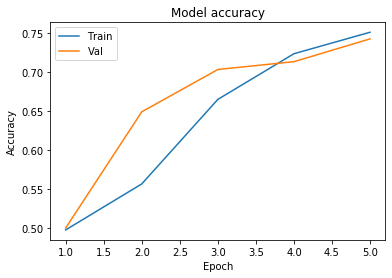

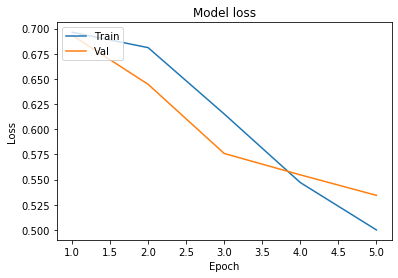

In [0]:
plot_learningCurve(history)

## Impliment First 3 Blocks of VGG16 Model

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', 
                 input_shape=(img_width, img_height,3)))
model.add(MaxPool2D(2, 2))

model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2, 2))

model = Sequential()
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2, 2))

model = Sequential()
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2, 2))

model.add(Flatten())
model.add(Dense(units = 128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(units=1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator),
                              epochs=5, validation_data=validation_generator, 
                              validation_steps=len(validation_generator), verbose=1)

Epoch 1/5
1000/1000 [==============================] - 360s 360ms/step - loss: 7.7078 - accuracy: 0.5028 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/5
1000/1000 [==============================] - 356s 356ms/step - loss: 7.7125 - accuracy: 0.4973 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/5
1000/1000 [==============================] - 356s 356ms/step - loss: 7.7125 - accuracy: 0.5011 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/5
1000/1000 [==============================] - 357s 357ms/step - loss: 7.7125 - accuracy: 0.4908 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/5
1000/1000 [==============================] - 357s 357ms/step - loss: 7.7125 - accuracy: 0.4986 - val_loss: 7.7125 - val_accuracy: 0.5000


### Batch Normalization and Drouput

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', 
                 input_shape=(img_width, img_height,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.2))

model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3))

model = Sequential()
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units = 128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator),
                              epochs=10, validation_data=validation_generator, 
                              validation_steps=len(validation_generator), verbose=1)

Epoch 1/10
1000/1000 [==============================] - 368s 368ms/step - loss: 0.6692 - accuracy: 0.6360 - val_loss: 0.6280 - val_accuracy: 0.6730
Epoch 2/10
1000/1000 [==============================] - 366s 366ms/step - loss: 0.5935 - accuracy: 0.6967 - val_loss: 0.5415 - val_accuracy: 0.7378
Epoch 3/10
1000/1000 [==============================] - 367s 367ms/step - loss: 0.5553 - accuracy: 0.7214 - val_loss: 0.5392 - val_accuracy: 0.7348
Epoch 4/10
1000/1000 [==============================] - 366s 366ms/step - loss: 0.5360 - accuracy: 0.7358 - val_loss: 0.5304 - val_accuracy: 0.7462
Epoch 5/10
1000/1000 [==============================] - 363s 363ms/step - loss: 0.5232 - accuracy: 0.7477 - val_loss: 0.5176 - val_accuracy: 0.7548
Epoch 6/10
1000/1000 [==============================] - 361s 361ms/step - loss: 0.4966 - accuracy: 0.7617 - val_loss: 0.5065 - val_accuracy: 0.7640
Epoch 7/10
1000/1000 [==============================] - 359s 359ms/step - loss: 0.4816 - accuracy: 0.7740 - val_

In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

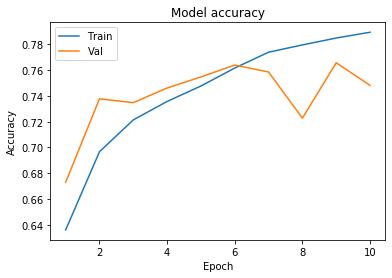

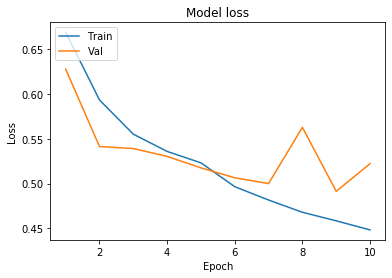

In [0]:
plot_learningCurve(history, 10)